# Časovne količine

Časovno količino $\textbf{a}$ opišemo z urejenim zaporedjem 
$$ \textbf{a} = [ (s_1,f_1,v_1), (s_1,f_1,v_1), \ldots, (s_1,f_1,v_1) ] $$
kjer trojica $(s_i,f_i,v_i)$ pove, da ima časovna količina $\textbf{a}$ na intervalu $[s_i,f_i)$ vrednost $v_i$. Zunaj intervalov ima vrednost nedoločeno .

In [1]:
tmin = 1
tmax = 22
a = [(1,5,2),(6,8,1),(11,12,3),(14,16,2),(17,18,5),(19,20,1)]
b = [(2,3,4),(4,7,3),(9,10,2),(13,15,5),(16,21,1)]
println("a = $a")
println("b = $b")

a = [(1, 5, 2), (6, 8, 1), (11, 12, 3), (14, 16, 2), (17, 18, 5), (19, 20, 1)]
b = [(2, 3, 4), (4, 7, 3), (9, 10, 2), (13, 15, 5), (16, 21, 1)]


## Uporaba stolpčnih prikazov

Za uporabo v drugih zvezkih funkcije za stolpčne prikaze zberemo na datoteki <tt>TQ.jl</tt>. Kasneje, ko se bom naučil kako, bom to datoteko predelal v knjižnico. Zaenkrat taka kot je zadostuje.

In [11]:
include("TQ.jl")

showPairTQ (generic function with 1 method)

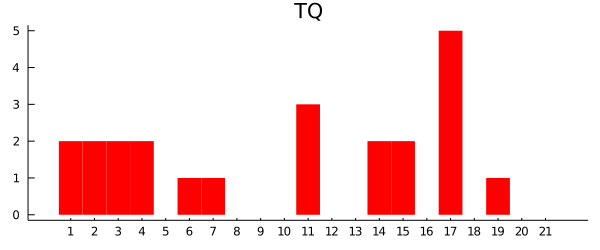

In [12]:
tmin = 1
tmax = 21
showTQ(a,fc=:red)

## Pretvorbe časovnih količin

In [5]:
function standardTQ(a)
    if length(a) == 0
        return a
    end
    fc = Inf
    sc = Inf 
    c = []
    vc = 0
    for i in a
        sa,fa,va = i
        if fc == sa
            if vc == va
                fc = fa
            else
                if (sc !== fc) && (vc !== NaN)
                    push!(c,(sc,fc,vc))
                end
                vc = va
                sc = sa
                fc = fa
            end
        else
            if (fc !== Inf) && (sc !== fc) && (vc !== NaN)
                push!(c,(sc,fc,vc))
            end
            sc = sa
            fc = fa
            vc = va
        end
    end
    if (sc !== fc) && (vc !== NaN)
        push!(c,(sc,fc,vc))
    end
    return c
end
sa = []
sb = a
sc = [ (1,3,2), (3,5,2), (7,9,1), (9,11,1)]
println(standardTQ(sa))
println(standardTQ(sb))
println(standardTQ(sc))

Any[]
Any[(1, 5, 2), (6, 8, 1), (11, 12, 3), (14, 16, 2), (17, 18, 5), (19, 20, 1)]
Any[(1, 5, 2), (7, 11, 1)]


In [7]:
s = [(1,5,2),(5,8,1),(11,12,3),(14,16,2),(16,18,5),(19,20,1)]
sn = [(1,5,-2),(5,8,1),(11,12,-3),(14,16,-2),(16,18,5),(19,20,-1)]

6-element Array{Tuple{Int64,Int64,Int64},1}:
 (1, 5, -2)
 (5, 8, 1)
 (11, 12, -3)
 (14, 16, -2)
 (16, 18, 5)
 (19, 20, -1)

In [8]:
function summaryTQ(a)
# (tMin,tMax,vMin,vMax)
    if length(a) == 0  
        return (NaN, NaN, NaN, NaN)
    end
    V = [ i[3] for i in a ]
    return (a[1][1],a[end][2],minimum(V),maximum(V))
end
println(summaryTQ(s))
println(summaryTQ([]))

(1, 20, 1, 5)
(NaN, NaN, NaN, NaN)


In [9]:
function maxTQ(a)
    if length(a) == 0 
        return -Inf
    end
    V = [ i[3] for i in a ]
    return maximum(V)
end
println("max = $(maxTQ(sn))")

max = 5


In [10]:
function absTQ(a)
    return map(x -> (x[1],x[2],abs(x[3])), a)
end
println("abs = $(absTQ(sn))")

abs = [(1, 5, 2), (5, 8, 1), (11, 12, 3), (14, 16, 2), (16, 18, 5), (19, 20, 1)]


In [13]:
function binaryTQ(a)
    return standardTQ(map(x -> (x[1],x[2],(x[3]>0 ? 1 : NaN)), a))
end
println("bin = $(binaryTQ(sn))")

bin = Any[(5, 8, 1), (16, 18, 1)]


In [14]:
function setConstTQ(a,c)
    return standardTQ(map(x -> (x[1],x[2],c), a))
end
println("con = $(setConstTQ(sn,3))")

con = Any[(1, 8, 3), (11, 12, 3), (14, 18, 3), (19, 20, 3)]


In [15]:
function prodConstTQ(a,c)
    return [ (sa,fa,va*c) for (sa,fa,va) in a ]
end
println("Pcon = $(prodConstTQ(sn,3))")

Pcon = [(1, 5, -6), (5, 8, 3), (11, 12, -9), (14, 16, -6), (16, 18, 15), (19, 20, -3)]


In [16]:
function GTcutTQ(a,c)
    return [(sa,fa,va) for (sa,fa,va) in a if va > c]
end
println("GT = $(GTcutTQ(sn,2))")

GT = [(16, 18, 5)]


In [17]:
function GEcutTQ(a,c)
    return [(sa,fa,va) for (sa,fa,va) in a if va >= c]
end

GEcutTQ (generic function with 1 method)

In [18]:
function totalTQ(a)
    return a == [] ? 0 : sum([(fa-sa)*abs(va) for (sa,fa,va) in a])
end
println("tot = $(totalTQ(sn))")

tot = 29


## Ponovniki

Julia pozna ponovnike (iterators), ki jih lahko uporabljamo v zankah za obdelavo členov danega zaporedja. Običajno nekako takole:

In [5]:
# s = 'A':'F'
s = [(1,5,2),(6,8,1),(11,12,3),(14,16,2),(17,18,5),(19,20,1)]
item = iterate(s)
println(item)    
while item !== nothing
    (element, state) = item  
    println(element)   # body
    println(state)
    item = iterate(s, state)
    println(item)
end

((1, 5, 2), 2)
(1, 5, 2)
2
((6, 8, 1), 3)
(6, 8, 1)
3
((11, 12, 3), 4)
(11, 12, 3)
4
((14, 16, 2), 5)
(14, 16, 2)
5
((17, 18, 5), 6)
(17, 18, 5)
6
((19, 20, 1), 7)
(19, 20, 1)
7
nothing


In [2]:
function getTQ(A)
    if A == nothing
        return (Inf,Inf,0)
    end
    return A[1]
end

A = iterate(a)
println(A)    
while A !== nothing
    (sa,fa,va) = getTQ(A) 
    println((sa,fa,va))   # body
    println(A[2])
    A = iterate(a,A[2])
    println(A)    
end

((1, 5, 2), 2)
(1, 5, 2)
2
((6, 8, 1), 3)
(6, 8, 1)
3
((11, 12, 3), 4)
(11, 12, 3)
4
((14, 16, 2), 5)
(14, 16, 2)
5
((17, 18, 5), 6)
(17, 18, 5)
6
((19, 20, 1), 7)
(19, 20, 1)
7
nothing


## Seštevanje in množenje časovnih količin

Ker so časovne količine urejene, lahko pri postopkih za seštevanje in množenje uporabimo zlivanje (merge).

In [9]:
⊕ = +

function getTQ(A)
    if A == nothing
        return (Inf,Inf,0)
    end
    return A[1]
end

function sumTQ(a,b)
    if length(a) == 0
        return b
    elseif length(b) == 0
        return a
    end
    c = []
    A = iterate(a)
    B = iterate(b)
    (sa,fa,va) = getTQ(A)
    (sb,fb,vb) = getTQ(B)
    while (A !== nothing) || (B !== nothing)
        if sa < sb
            sc = sa
            vc = va
            if sb < fa
                fc = sb
                sa = sb
            else
                fc = fa
                A = iterate(a,A[2])
                (sa,fa,va) = getTQ(A)
            end
        elseif sa == sb
            sc = sa
            fc = min(fa,fb)
            vc = va ⊕ vb
            sa = sb = fc
            fA = fa
            if fA <= fb
                A = iterate(a,A[2])
                (sa,fa,va) = getTQ(A)
            end
            if fb <= fA
                B = iterate(b,B[2])
                (sb,fb,vb) = getTQ(B)
            end
         else
            sc = sb
            vc = vb
            if sa < fb
                fc = sa
                sb = sa
            else
                fc = fb
                B = iterate(b,B[2])
                (sb,fb,vb) = getTQ(B)
            end
        end
        push!(c,(sc,fc,vc))
    end
    return standardTQ(c)
end

⊞ = sumTQ
s = a⊞b
println("a⊞b = $s")

a⊞b = Any[(1, 2, 2), (2, 3, 6), (3, 4, 2), (4, 5, 5), (5, 6, 3), (6, 7, 4), (7, 8, 1), (9, 10, 2), (11, 12, 3), (13, 14, 5), (14, 15, 7), (15, 16, 2), (16, 17, 1), (17, 18, 6), (18, 19, 1), (19, 20, 2), (20, 21, 1)]


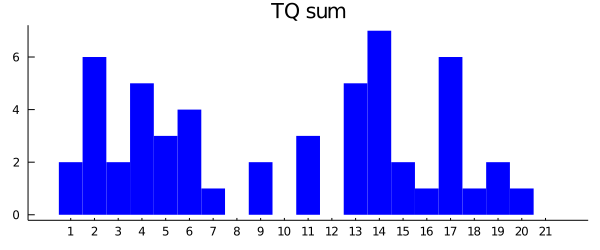

In [13]:
showTQ(s,ti="TQ sum")

In [14]:
⊙ = *

function prodTQ(a,b)
    if length(a)*length(b) == 0
        return([])
    end
    c = []
    A = iterate(a)
    B = iterate(b)
    (sa,fa,va) = getTQ(A)
    (sb,fb,vb) = getTQ(B)
    while (A !== nothing) || (B !== nothing)
        if fa <= sb
            A = iterate(a,A[2])
            (sa,fa,va) = getTQ(A)
        elseif fb <= sa
            B = iterate(b,B[2])
            (sb,fb,vb) = getTQ(B)
        else
            sc = max(sa,sb)
            fc = min(fa,fb)
            vc = va⊙vb
            push!(c,(sc,fc,vc))
            if fc == fa
                A = iterate(a,A[2])
                (sa,fa,va) = getTQ(A)
            end
            if fc == fb
                B = iterate(b,B[2])
                (sb,fb,vb) = getTQ(B)
            end
        end
    end
    return standardTQ(c)
end

⊡ = prodTQ
p = a⊡b
println("a⊡b = $p")

a⊡b = Any[(2, 3, 8), (4, 5, 6), (6, 7, 3), (14, 15, 10), (17, 18, 5), (19, 20, 1)]


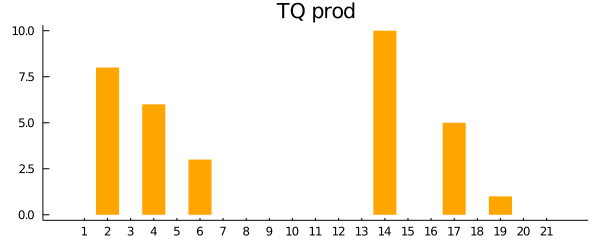

In [16]:
showTQ(p,ti="TQ prod",fc=:orange)

a⊞b = Any[(1, 5, 2), (5, 6, 3), (6, 8, 1), (9, 10, 2), (11, 12, 3), (13, 14, 5), (14, 16, 2), (16, 21, 1)]


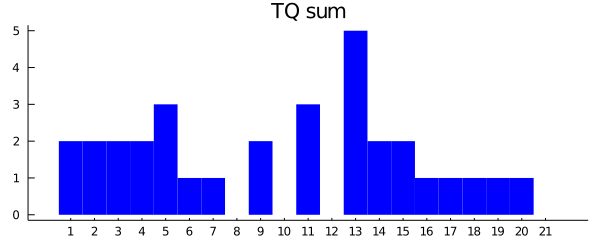

In [18]:
⊕ = min
s1 = a⊞b
println("a⊞b = $s1")
showTQ(s1,ti="TQ sum")

a⊡b = Any[(2, 3, 6), (4, 5, 5), (6, 7, 4), (14, 15, 7), (17, 18, 6), (19, 20, 2)]


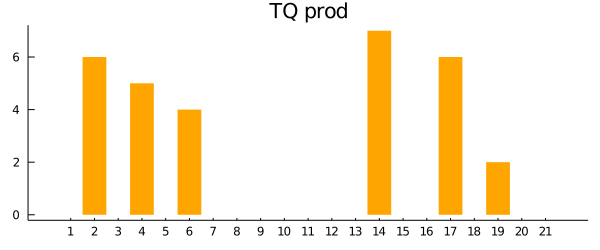

In [17]:
⊙ = +
p1 = a⊡b
println("a⊡b = $p1")
showTQ(p1,ti="TQ prod",fc=:orange)

## Načrti

Prepisati v Julijo še nekaj dodatnih funkcij iz pythonske knjižnice TQ.

Razvite funkcije bo potrebno še ustrezno zapakirati v knjižnico (ko se bom tega naučil). Dober zgled je najti v članku:

* Shah, Viral B., Alan Edelman, Stefan Karpinski, Jeff Bezanson,
and Jeremy Kepner. “Novel Algebras for Advanced Analytics in
Julia.” 2013 IEEE High Performance Extreme Computing Conference
(HPEC) (September 2013). doi:10.1109/hpec.2013.6670347. [GitHub](https://github.com/JuliaComputing/SemiringAlgebra.jl)

Zanimiv je tudi članek:

* Stephen Dolan: Fun with Semirings; A functional pearl on the abuse of linear algebra. ICFP '13: Proceedings of the 18th ACM SIGPLAN international conference on Functional programming, September 2013 Pages 101–110. https://doi.org/10.1145/2500365.2500613


[Kazalo](kazalo.ipynb)